<a href="https://colab.research.google.com/github/BrianGirardiRice/Public/blob/main/Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import sys
sys.meta_path[:] = [f for f in sys.meta_path if "DaskFinder" not in str(f)]

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
import random


Most common results:
10111: 72 times
10110: 55 times
10101: 49 times
10000: 48 times
11101: 46 times
10001: 43 times
11001: 43 times
00110: 41 times
11100: 41 times
01001: 41 times
01110: 38 times
00000: 38 times
10100: 35 times
00111: 33 times
00010: 33 times
11000: 33 times
00011: 32 times
00001: 32 times
01100: 28 times
01111: 28 times
01000: 28 times
01011: 26 times
00101: 26 times
01010: 25 times
01101: 23 times
00100: 21 times
11011: 9 times
11010: 8 times
11110: 8 times
10011: 6 times
10010: 6 times
11111: 5 times
0: ─────────H───X───@───X───────@───@───X───X───@───X───X───@───X───H───X───────@───X───H───────M('result')───
                    │           │   │   │       │           │                   │               │
1: ─────────H───X───@───X───X───┼───┼───┼───────@───X───────@───H───X───────────@───X───H───────M─────────────
                    │           │   │   │       │           │                   │               │
2: ─────────H───X───┼───@───X───┼───┼───┼───@───@──────

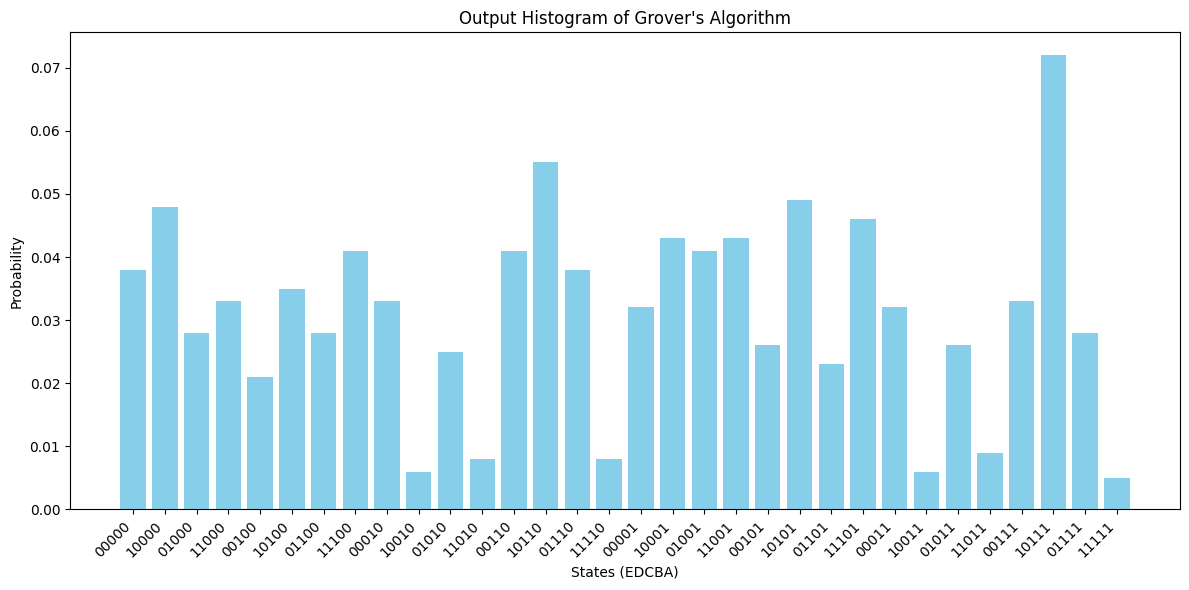

In [46]:
# Form circuit
qubits = [cirq.LineQubit(i) for i in range(5)]  # 5 input qubits + 1 ancilla
ancilla = cirq.NamedQubit("Ancilla")

'''
#Form curcuit
qubits = [cirq.LineQubit(i) for i in range(6)]  # 5 input qubits + 1 ancilla

def oracle():
    # NOT A and NOT B
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])
    yield cirq.CCNOT(qubits[0], qubits[1], ancilla)  # AND gate
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])

    # XOR NOT C
    yield cirq.X(qubits[2])
    yield cirq.CNOT(qubits[2], ancilla)
    yield cirq.X(qubits[2])

    #XOR E or A
    yield cirq.CNOT(qubits[4], ancilla)
    yield cirq.CNOT(qubits[0], ancilla)
    yield cirq.CCNOT(qubits[0], qubits[4], ancilla)  #If both E and A


    #to satisfy not [D and C], flip back to 0 if [D and C]
    yield cirq.CCNOT(qubits[3], qubits[2], ancilla)

    #Ensures that if flipped to 1 by previous operation, flips back
    yield cirq.CCZ(qubits[3], qubits[2], ancilla)
    yield cirq.H(ancilla)
    yield cirq.H(ancilla)


def diffusion():
    qubits = qubits[:-1]

    # Apply Hadamard gates to all qubits
    for q in qubits:
        yield cirq.H(q)

    # Apply a multi-controlled Z gate (equivalent to 2|0...0><0...0| - I)
    yield cirq.Z(qubits[0]).controlled_by(*qubits[1:])

    # Apply Hadamard gates again to all qubits
    for q in qubits:
        yield cirq.H(q)

# Construct the Grover's algorithm circuit
circuit = cirq.Circuit()
circuit.append(cirq.H.on_each(*qubits[:-1]))
circuit.append(cirq.X(ancilla))
circuit.append(cirq.H(ancilla))

# One iteration
circuit.append(oracle())
circuit.append(diffusion())
circuit.append(oracle())
circuit.append(diffusion())
circuit.append(oracle())
circuit.append(diffusion())

circuit.append(cirq.measure(*qubits[:-1], key='result'))

# Run the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Analyze the results
frequencies = result.histogram(key='result')
sorted_frequencies = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

print("Most common results:")
for bitstring, count in sorted_frequencies[:32]:
    binary = format(bitstring, '05b')[::-1]  # Reverse to match EDCBA order
    print(f"{binary}: {count} times")

print(circuit)
'''

'''
def oracle():
    # NOT A and NOT B
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])
    yield cirq.TOFFOLI(qubits[0], qubits[1], ancilla)  # AND gate
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])

    # XOR NOT C
    yield cirq.X(qubits[2])
    yield cirq.CNOT(qubits[2], ancilla)
    yield cirq.X(qubits[2])

    # XOR E or A
    yield cirq.CNOT(qubits[4], ancilla)
    yield cirq.CNOT(qubits[0], ancilla)
    yield cirq.TOFFOLI(qubits[0], qubits[4], ancilla)  # If both E and A

    # To satisfy NOT (D AND C), flip back to 0 if (D AND C)
    yield cirq.TOFFOLI(qubits[3], qubits[2], ancilla)

    #Ensures that if flipped to 1 by previous operation, flips back
    yield cirq.CCZ(qubits[3], qubits[2], ancilla)
    yield cirq.H(ancilla)
    yield cirq.H(ancilla)

'''
def oracle():



    # NOT A and NOT B
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])
    yield cirq.TOFFOLI(qubits[0], qubits[1], ancilla)  # AND gate
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])

    # XOR NOT C
    yield cirq.X(qubits[2])
    yield cirq.CNOT(qubits[2], ancilla)
    yield cirq.X(qubits[2])

    # XOR (E or A)
    yield cirq.CNOT(qubits[4], ancilla)
    yield cirq.CNOT(qubits[0], ancilla)
    yield cirq.TOFFOLI(qubits[0], qubits[4], ancilla)  # If both E and A

    # Save the state before applying NOT (D AND C)
    yield cirq.CNOT(ancilla, qubits[0])  # Temporarily store XOR result in A's qubit

    # To satisfy NOT (D AND C), flip back to 0 if (D AND C)
    yield cirq.TOFFOLI(qubits[3], qubits[2], ancilla)

    #Flip again if D and C met but not XOR. Failing XOR requires 0 or 2

    #Flip back if 2 XORs and D and C
    #Requires not A, not B, E
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])
    yield cirq.X(ancilla).controlled_by(qubits[0], qubits[1], qubits[3], qubits[2], qubits[4])  # Ensures XOR was true before flipping back
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])

    #Flip back if 0 XORs and D and C
    #requires (not E and not A and B).
    yield cirq.X(qubits[4])
    yield cirq.X(qubits[0])
    yield cirq.X(ancilla).controlled_by(qubits[0], qubits[1], qubits[4], qubits[3], qubits[2])
    yield cirq.X(qubits[4])
    yield cirq.X(qubits[0])




def diffusion():

    # Apply Hadamard gates to all qubits
    yield cirq.H.on_each(*qubits)

    # Apply X gates
    yield cirq.X.on_each(*qubits)

    # Apply multi-controlled Z gate
    yield cirq.H(qubits[4])
    yield cirq.Z(qubits[4]).controlled_by(*qubits[:-1])
    yield cirq.H(qubits[4])


    # Apply X gates again
    yield cirq.X.on_each(*qubits)

    # Apply Hadamard gates again
    yield cirq.H.on_each(*qubits)




# Construct the Grover's algorithm circuit
circuit = cirq.Circuit()

circuit.append(cirq.H.on_each(*qubits))
circuit.append(cirq.X(ancilla))
circuit.append(cirq.H(ancilla))

# Grover iterations
for _ in range(1):

    circuit.append(oracle())
    circuit.append(diffusion())

circuit.append(cirq.measure(*qubits, key='result'))

def bitstring(bits):
    return "".join(str(int(b)) for b in bits)


# Run the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)


# Look at the sampled bitstrings.
frequencies = result.histogram(key="result")


# Sort frequencies by state
states = list(range(2**5))
probabilities = [frequencies.get(state, 0) / 1000.0 for state in states]

# Create the histogram plot
plt.figure(figsize=(12, 6))
plt.bar(states, probabilities, color='skyblue')
plt.xlabel("States (EDCBA)")
plt.ylabel("Probability")
plt.title("Output Histogram of Grover's Algorithm")
plt.xticks(states, [format(state, '05b')[::-1] for state in states], rotation=45, ha="right")
plt.tight_layout()

# Analyze the results
frequencies = result.histogram(key='result')
sorted_frequencies = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

print("Most common results:")
for bitstring, count in sorted_frequencies[:32]:
    binary = format(bitstring, '05b')[::-1]  # Reverse to match EDCBA order
    print(f"{binary}: {count} times")

print(circuit)
